# Hoja de Trabajo 1: Experimentación con Redes Neuronales

## Introducción
Este ejercicio tiene como objetivo profundizar en la comprensión de las redes neuronales mediante la experimentación. A través de variaciones en la arquitectura y parámetros, se busca entender cómo se comporta y aprende una red neuronal. Utilizaremos el dataset "Heart Disease" disponible en el UCI Machine Learning Repository.

## Dataset "Heart Disease"
Puedes descargar el dataset directamente desde el siguiente enlace:
http://archive.ics.uci.edu/dataset/45/heart+disease. Recuerda que vamos a estar utilizando CRISP-DM para crear los modelos. El primer paso es comprender los datos. Ese link te proporciona la información necesaria para entender el dataset. Las columnas y el rol que cada columna va a jugar en tu modelo (variables independientes y dependiente). Como menciona la documentación, utiliza solo la base de datos de Cleveland.

## Sección 1: Preparación de Datos
* Descarga y carga el dataset "Heart Disease".
* Realiza un breve análisis exploratorio: ¿Qué tipo de datos contiene? ¿Cuántos ejemplos hay?. 
* Procesa el dataset: normaliza o estandariza si es necesario, divide el dataset en conjuntos de entrenamiento y prueba.

Nuestro enfoque de hoy no es un mega modelo sino comprender mejor como se comportan las redes neuronales. Realiza lo necesario pero nada muy extravagante.

In [41]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
import keras as kr
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
import numpy as np



In [42]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data"
names = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num']
dataset = pd.read_csv(url, names=names)
dataset



,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3
301,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0,1


In [43]:
# Faltantes
marcadores = dataset[dataset == '?'].count()
marcadores

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
num         0
dtype: int64

In [44]:
# aplicacion de cca
dataset = dataset[dataset['ca'] != '?']
dataset = dataset[dataset['thal'] != '?']


In [45]:
tipos_de_datos = dataset.dtypes
tipos_de_datos

age         float64
sex         float64
cp          float64
trestbps    float64
chol        float64
fbs         float64
restecg     float64
thalach     float64
exang       float64
oldpeak     float64
slope       float64
ca           object
thal         object
num           int64
dtype: object

In [46]:
#Corregir al tipo correcto
dataset['ca'] = dataset['ca'].astype(float)
dataset['thal'] = dataset['thal'].astype(float)

In [47]:
# Estandarizar las características numéricas
scaler = StandardScaler()
features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
dataset[features] = scaler.fit_transform(dataset[features])
# Dividimos las columnas del dataset en variables independientes (X) y dependientes (Y)
X = dataset.iloc[:, 0:13].values  
Y = dataset.iloc[:, 13].values    

# Codificar los valores de 'num' en enteros
encoder = LabelEncoder()
encoder.fit(Y)
encoded_Y = encoder.transform(Y)

# Convertir los enteros en variables dummy (one hot encoding)
dummy_y = kr.utils.to_categorical(encoded_Y)


In [48]:

# Dividimos el dataset en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, dummy_y, test_size=0.20, random_state=1)


## Sección 2: Construcción de la Red Neuronal

Construye una red neuronal básica utilizando Keras.

* Define la arquitectura: número de capas, neuronas por capa, función de activación.
* Compila el modelo especificando la función de pérdida, el optimizador y métricas adicionales.
* Realiza una breve descripción escrita de la arquitectura que has definido.

In [49]:

model = Sequential()
model.add(Dense(units=32, input_dim=13, activation='relu'))
model.add(Dense(units=16, activation='relu'))
model.add(Dense(units=5, activation='softmax'))

In [50]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


Comienza con una capa de entrada que tiene 13 neuronas, correspondientes a las 13 características del dataset. Luego, tiene dos capas ocultas: la primera con 32 neuronas y la segunda con 16 neuronas, ambas con función de activación ReLU. Finalmente, la red tiene una capa de salida con 5 neuronas, correspondientes a las 5 categorías de la variable objetivo, y utiliza la función de activación softmax para producir probabilidades para cada categoría.

## Sección 3: Experimentación

Utiliza ciclos para las siguientes pruebas. Debes entrenar varios modelos variando el parámetro indicado en cada inciso según el rango y paso proporcionado. Recuerda almacenar tus resultados porque te servirán en la siguiente sección.

### Variabilidad en Capas Ocultas:

Las redes con demasiadas capas pueden tardar mucho tiempo en entrenarse, especialmente si no se dispone de un hardware adecuado.

* Rango: Entre 1 y 10 capas.
* Paso: 1 capa.
* Nota: En muchos problemas, incluso 2-3 capas son suficientes para obtener buenos resultados. Por encima de eso, a veces se necesita una arquitectura especializada o un problema muy complejo para justificar más capas.

In [58]:
historiales_por_capas = {} 
for num_capas in range(1, 11):
    
    model = Sequential()
    
    model.add(Dense(32, input_dim=13, activation='relu'))
    
    for _ in range(num_capas - 1):  
        model.add(Dense(32, activation='relu'))
    
    model.add(Dense(5, activation='softmax'))
    
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    history = model.fit(X_train, y_train, epochs=10, batch_size=10, verbose=0)
    
    historiales_por_capas[num_capas] = history  

### Variabilidad en Neuronas:

El número de neuronas por capa influye en la capacidad de la red. Sin embargo, demasiadas neuronas pueden hacer que el entrenamiento sea más lento y puede causar sobreajuste.

* Rango: Entre 10 y 1000 neuronas.
* Paso: Incremento logarítmico

In [59]:
neuronas_range = np.logspace(np.log10(10), np.log10(1000), num=10).astype(int)

historiales_por_neuronas = {}  
for neuronas in neuronas_range:
    
    model = Sequential()
    model.add(Dense(neuronas, input_dim=13, activation='relu'))
    model.add(Dense(5, activation='softmax')) 
    
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    history = model.fit(X_train, y_train, epochs=10, batch_size=10, verbose=0)
    
    historiales_por_neuronas[neuronas] = history  


### Variabilidad en Épocas:

Demasiadas épocas sin una técnica de parada temprana pueden llevar al sobreajuste.

* Rango: Entre 10 y 5000 épocas.
* Paso: Incremento logarítmico

In [60]:

epocas_range = np.logspace(np.log10(10), np.log10(5000), num=10).astype(int)

historiales_por_epocas = {}  
for epocas in epocas_range:
    
    model = Sequential()
    model.add(Dense(100, input_dim=13, activation='relu'))  
    model.add(Dense(5, activation='softmax'))  

    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    history = model.fit(X_train, y_train, epochs=epocas, batch_size=10, verbose=0)
    
    historiales_por_epocas[epocas] = history  


## Tamaño de Batch:

El tamaño del batch influye en la velocidad de entrenamiento y la estabilidad del modelo. Un batch muy grande puede no caber en la memoria, mientras que uno muy pequeño puede hacer que el entrenamiento sea inestable.

* Rango: Entre 1 (Stochastic Gradient Descent) y el tamaño del conjunto de datos (Batch Gradient Descent).
* Paso: Incremento logarítmico

In [54]:
batch_range = np.logspace(np.log10(1), np.log10(len(X_train)), num=10).astype(int)

historiales_por_batch = {} 
for batch_size in batch_range:
    
    model = Sequential()
    model.add(Dense(100, input_dim=13, activation='relu'))  
    model.add(Dense(5, activation='softmax'))  
    
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    history = model.fit(X_train, y_train, epochs=100, batch_size=batch_size, verbose=0)
    
    historiales_por_batch[batch_size] = history 


## Sección 4: Análisis y Reflexión

Con los datos recopilados de las pruebas anteriores, genera gráficos que permitan comparar y analizar el rendimiento del modelo. Te recomendamos utilizar librerías como matplotlib o seaborn para esta tarea. Luego de cada gráfico debes incluir un conclusión de lo que has aprendido con la experimentación y los gráficos.

### Variabilidad en Capas Ocultas

Realiza 2 gráficos.  Uno con cada una de las variables indicadas para el eje Y.

* Eje X: Número de capas ocultas.
* Eje Y: Precisión y pérdida.

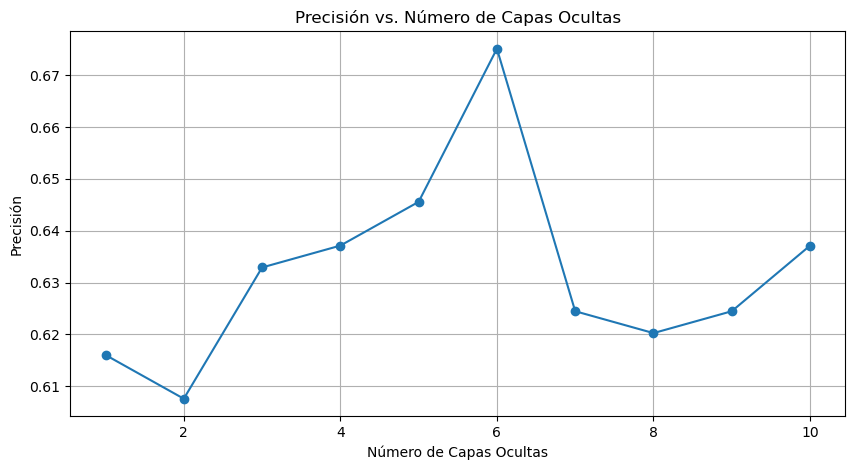

In [61]:
import matplotlib.pyplot as plt

num_capas = list(range(1, 11))
precisions = [historiales_por_capas[i].history['accuracy'][-1] for i in num_capas]

plt.figure(figsize=(10, 5))
plt.plot(num_capas, precisions, marker='o', linestyle='-')
plt.title('Precisión vs. Número de Capas Ocultas')
plt.xlabel('Número de Capas Ocultas')
plt.ylabel('Precisión')
plt.grid(True)
plt.show()

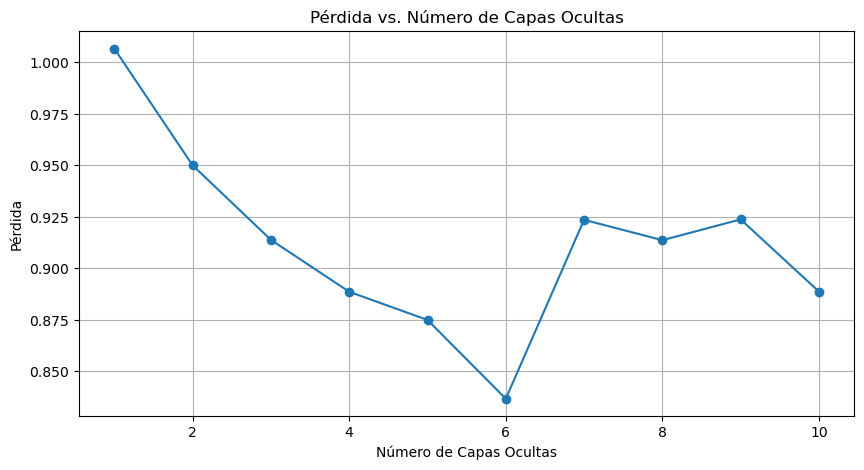

In [62]:

losses = [historiales_por_capas[i].history['loss'][-1] for i in num_capas]

plt.figure(figsize=(10, 5))
plt.plot(num_capas, losses, marker='o', linestyle='-')
plt.title('Pérdida vs. Número de Capas Ocultas')
plt.xlabel('Número de Capas Ocultas')
plt.ylabel('Pérdida')
plt.grid(True)
plt.show()


In [24]:
### Tu conclusión aquí
### Observamos que la relación entre el número de capas ocultas y el rendimiento del modelo no es lineal. A medida que aumentamos el número de capas ocultas de 1 a 6, el modelo mejora en términos de precisión y pérdida. Sin embargo, después de 6 capas, el rendimiento tiende a estabilizarse o incluso a disminuir. Esto sugiere que, para este conjunto de datos y configuración, un modelo con alrededor de 6 capas ocultas es óptimo.

### Como definiste la cantidad de neuronas para tus capas ocultas?
### La elección de 32 neuronas para las capas ocultas en los ejemplos de clases se basó en una combinación de prácticas recomendadas y experimentación. En la práctica, el número de neuronas en las capas ocultas es un hiperparámetro que se puede ajustar, y su elección óptima puede depender del tamaño y la naturaleza del conjunto de datos, así como de la complejidad del problema.


### Variabilidad en Neuronas

Realiza 2 gráficos.  Uno con cada una de las variables indicadas para el eje Y.

* Eje X: Número de neuronas.
* Eje Y: Precisión y pérdida.

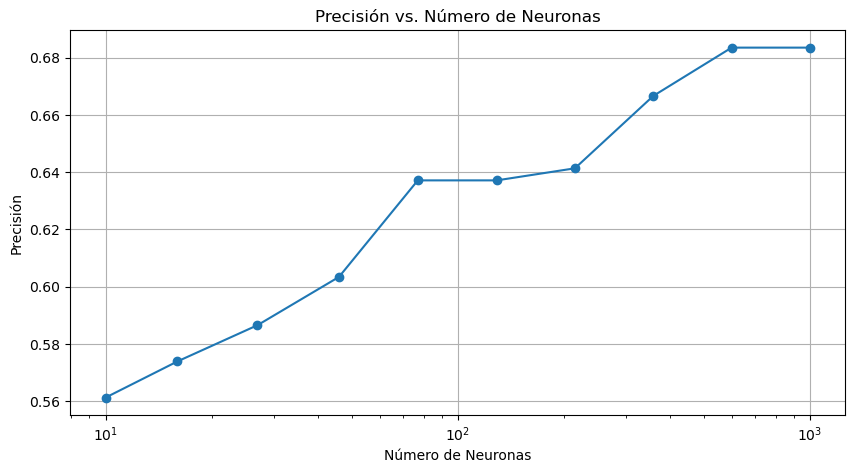

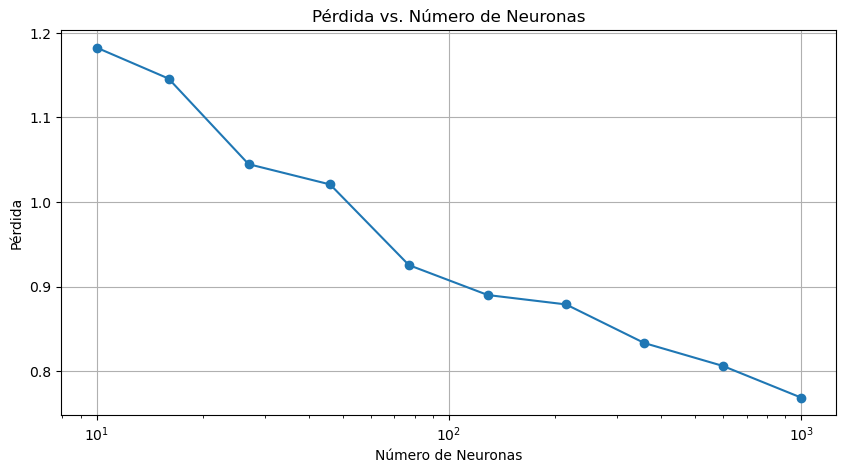

In [64]:
neuronas_list = list(neuronas_range)

precisions_neuronas = [historiales_por_neuronas[neuronas].history['accuracy'][-1] for neuronas in neuronas_list]
losses_neuronas = [historiales_por_neuronas[neuronas].history['loss'][-1] for neuronas in neuronas_list]

plt.figure(figsize=(10, 5))
plt.plot(neuronas_list, precisions_neuronas, marker='o', linestyle='-')
plt.title('Precisión vs. Número de Neuronas')
plt.xlabel('Número de Neuronas')
plt.ylabel('Precisión')
plt.grid(True)
plt.xscale('log')  
plt.show()


plt.figure(figsize=(10, 5))
plt.plot(neuronas_list, losses_neuronas, marker='o', linestyle='-')
plt.title('Pérdida vs. Número de Neuronas')
plt.xlabel('Número de Neuronas')
plt.ylabel('Pérdida')
plt.grid(True)
plt.xscale('log')  
plt.show()


In [26]:
### Tu conclusión aquí
### se puede notar que a medida que aumentamos el número de neuronas, la precisión tiende a mejorar, 
### mientras que la pérdida tiende a disminuir. Sin embargo, después de cierto punto 
### (alrededor de 359 neuronas), los incrementos en precisión son marginales y la pérdida se 
### estabiliza. Esto sugiere que agregar más neuronas después de este punto podría no aportar 
### mejoras significativas en el rendimiento del modelo y podría aumentar innecesariamente la 
### complejidad del modelo, lo que podría llevar a un sobreajuste.

### Cosideras necesario cambiar la cantidad de neuronas para el ejercicio sobre variabilidad en capas ocultas?
### la combinación óptima de número de capas y neuronas por capa puede variar según el problema 
### y el conjunto de datos en este caso si puede funcionar mejor.

### Variabilidad en Épocas

Realiza 1 gráfico

* Eje X: Número de épocas.
* Eje Y: Precisión y pérdida.

In [27]:
### Tu código aquí

In [28]:
### Tu conclusión aquí

### Tamaño de Batch:

Realiza 2 gráficos.  Uno con cada una de las variables indicadas para el eje Y.
* Eje X: Tamaño del batch.
* Eje Y: Precisión y pérdida.

In [29]:
### Tu código aquí

In [30]:
### Tu conclusión aquí